In [7]:
pip install mpl_toolkits

ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits
Note: you may need to restart the kernel to use updated packages.


<Figure size 800x600 with 0 Axes>

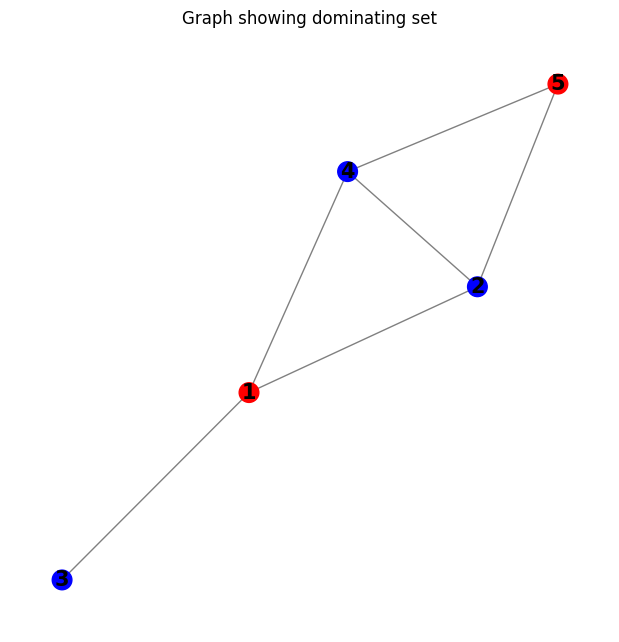

In [20]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import heapq
from collections import defaultdict

def main():
    df = pd.read_csv("input.csv")
    adjacencyList = defaultdict(list)
    for row, col in df.iterrows():
        source, dest = col['row'], col['col']
        adjacencyList[source].append(dest)
        adjacencyList[dest].append(source)

    G = nx.Graph()
    for node, neighbors in adjacencyList.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    dominant = dominant_set(adjacencyList)
    pos = nx.spring_layout(G, k=0.5, iterations=50)
    fig = plt.figure(figsize=(8, 6))
    plt.figure(figsize=(6, 6))
    nx.draw(G, pos, with_labels=True, node_color=["red" if node in dominant else "blue" for node in G.nodes()], 
        edge_color="gray", node_size=200, font_size=15, font_weight="bold")
    plt.title("Graph showing dominating set")
    plt.show()
    # print(dominant_set(adjacencyList))

def dominant_set(graph):
    nodes_to_cover = set(graph.keys())
    dominant = set()

    max_heap = [(-len(neighbours), node) for node, neighbours in graph.items()]
    heapq.heapify(max_heap)

    while nodes_to_cover:
        while max_heap:
            first, node = heapq.heappop(max_heap)
            if node in nodes_to_cover:
                break
        dominant.add(node)
        nodes_to_cover.discard(node)
        nodes_to_cover -= set(graph[node])
        max_heap = [(-len(set(graph[node]) & nodes_to_cover), node) for node in nodes_to_cover]
        heapq.heapify(max_heap)
    return dominant

if __name__ == "__main__":
    main()